<a href="https://colab.research.google.com/github/Iam-whizzy/DataScience/blob/main/anti_femicide_articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from bs4 import BeautifulSoup
import requests

In [7]:
url = "https://www.standardmedia.co.ke/health/national/article/2001489301/stop-killing-us-kenyan-women-demand-in-nationwide-femicide-protests"
page = requests.get(url)
print(page.content)
soup = BeautifulSoup(page.content, "html.parser")
section = soup.findAll("p", class_="paragraph-style")
soup = BeautifulSoup(str(section))
text = soup.get_text()
text

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<title>Stop killing us, Kenyan women demand in nationwide anti-femicide protests - The Standard Health</title>\n<meta content="width=device-width, initial-scale=1.0" name="viewport">\n<meta name="developer" content="Omari Erick">\n<meta name="developer:email" content="omarica2006@gmail.com">\n<link rel="canonical" href="https://www.standardmedia.co.ke/health/national/article/2001489301/stop-killing-us-kenyan-women-demand-in-nationwide-anti-femicide-protests" />\n<link rel="amphtml" href="https://www.standardmedia.co.ke/health/amp/national/article/2001489301/stop-killing-us-kenyan-women-demand-in-nationwide-anti-femicide-protests" />\n<meta name="keywords" content="Femicide Cases,Rita Waeni Muendo Murder,Jeevanjee gardens,Femicide Protests" />\n<meta name="author" content="Esther Nyambura " />\n<meta name="description" content="Kenyans converge at Jeevanjee Gardens, Nairobi for a nationwide peaceful protest against ris

'[In Nairobi, women and men took to the streets demanding an end to violence., , The group led by Nairobi Woman Representative Esther Passaris, began their march at Jeevanjee Gardens and later proceeded to the Central Business District (CBD) chanting and carrying placards reading: “Stop killing us, united against femicide.”, Passaris, in an address, called on President William Ruto to speak up and address the femicide issue in the country, saying that his voice as the Head of State is important., , “I have spoken to several Cabinet Secretaries and said that the President’s voice needs to be heard on this issue. We need the President to speak on it. We need him to understand the families of these girls who have been brutally murdered have got so much trauma and they need to feel that the State is acting on their behalf,” she said.\xa0, In Mombasa County, leaders, human rights activists and residents gathered at Pembe za Ndovu on Moi Avenue and marched their way into the city., , Similar

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
from nltk.tokenize import word_tokenize
tokenized_words = word_tokenize(text)
print(tokenized_words)

['[', 'In', 'Nairobi', ',', 'women', 'and', 'men', 'took', 'to', 'the', 'streets', 'demanding', 'an', 'end', 'to', 'violence.', ',', ',', 'The', 'group', 'led', 'by', 'Nairobi', 'Woman', 'Representative', 'Esther', 'Passaris', ',', 'began', 'their', 'march', 'at', 'Jeevanjee', 'Gardens', 'and', 'later', 'proceeded', 'to', 'the', 'Central', 'Business', 'District', '(', 'CBD', ')', 'chanting', 'and', 'carrying', 'placards', 'reading', ':', '“', 'Stop', 'killing', 'us', ',', 'united', 'against', 'femicide.', '”', ',', 'Passaris', ',', 'in', 'an', 'address', ',', 'called', 'on', 'President', 'William', 'Ruto', 'to', 'speak', 'up', 'and', 'address', 'the', 'femicide', 'issue', 'in', 'the', 'country', ',', 'saying', 'that', 'his', 'voice', 'as', 'the', 'Head', 'of', 'State', 'is', 'important.', ',', ',', '“', 'I', 'have', 'spoken', 'to', 'several', 'Cabinet', 'Secretaries', 'and', 'said', 'that', 'the', 'President', '’', 's', 'voice', 'needs', 'to', 'be', 'heard', 'on', 'this', 'issue', '.',

In [10]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('could')
stop_words.add('president')
stop_words.add('william')
stop_words.add('sign')
stop_words.add('up')

print(stop_words)

{"wouldn't", "wasn't", 'theirs', 're', 'mustn', 'here', 'where', 've', 'haven', 'any', 'am', 'than', 'itself', 'hers', 'few', 'y', 'against', 'o', 'these', 'between', 'president', 'was', 'but', 'the', 'off', 'once', "doesn't", 'were', 'ma', 'can', 'being', 'won', "isn't", 'yourself', 'again', 'should', 'will', "that'll", 'do', 'with', 'into', 'hasn', "weren't", 'some', 'to', 'in', "she's", 'himself', 'shouldn', 't', 'how', 'be', 'a', 'what', 'mightn', 'had', "won't", 'same', 'he', 'they', 'myself', 'wouldn', 'ours', 'wasn', 'all', 'has', 'from', "couldn't", "should've", 'down', 'that', 'only', 'on', 'an', "you've", 'of', 'him', 'his', 'd', "hasn't", "mightn't", 'as', 'before', 'its', "you'd", 'have', 'she', 'which', 'been', 'just', 'doesn', "needn't", 'weren', 'having', 'not', 'my', 's', 'their', 'who', 'very', 'we', 'under', 'below', "haven't", 'about', 'yours', "aren't", 'over', 'out', 'so', 'your', 'ourselves', 'such', 'herself', "didn't", "you're", 'those', 'shan', 'through', "must

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
filtered_text = []
for word in tokenized_words:
  if word.lower() not in stop_words:
    filtered_text.append(word)


print(f"Orginial Words :{tokenized_words}")
print(f"Filtered Words :{filtered_text}")

Orginial Words :['[', 'In', 'Nairobi', ',', 'women', 'and', 'men', 'took', 'to', 'the', 'streets', 'demanding', 'an', 'end', 'to', 'violence.', ',', ',', 'The', 'group', 'led', 'by', 'Nairobi', 'Woman', 'Representative', 'Esther', 'Passaris', ',', 'began', 'their', 'march', 'at', 'Jeevanjee', 'Gardens', 'and', 'later', 'proceeded', 'to', 'the', 'Central', 'Business', 'District', '(', 'CBD', ')', 'chanting', 'and', 'carrying', 'placards', 'reading', ':', '“', 'Stop', 'killing', 'us', ',', 'united', 'against', 'femicide.', '”', ',', 'Passaris', ',', 'in', 'an', 'address', ',', 'called', 'on', 'President', 'William', 'Ruto', 'to', 'speak', 'up', 'and', 'address', 'the', 'femicide', 'issue', 'in', 'the', 'country', ',', 'saying', 'that', 'his', 'voice', 'as', 'the', 'Head', 'of', 'State', 'is', 'important.', ',', ',', '“', 'I', 'have', 'spoken', 'to', 'several', 'Cabinet', 'Secretaries', 'and', 'said', 'that', 'the', 'President', '’', 's', 'voice', 'needs', 'to', 'be', 'heard', 'on', 'this

In [12]:
clean_words = []
for word in filtered_text:
  if word.isalpha():
    clean_words.append(word)

print(f"Unclean Words :{filtered_text}")
print(f"Clean Words :{clean_words}")

Unclean Words :['[', 'Nairobi', ',', 'women', 'men', 'took', 'streets', 'demanding', 'end', 'violence.', ',', ',', 'group', 'led', 'Nairobi', 'Woman', 'Representative', 'Esther', 'Passaris', ',', 'began', 'march', 'Jeevanjee', 'Gardens', 'later', 'proceeded', 'Central', 'Business', 'District', '(', 'CBD', ')', 'chanting', 'carrying', 'placards', 'reading', ':', '“', 'Stop', 'killing', 'us', ',', 'united', 'femicide.', '”', ',', 'Passaris', ',', 'address', ',', 'called', 'Ruto', 'speak', 'address', 'femicide', 'issue', 'country', ',', 'saying', 'voice', 'Head', 'State', 'important.', ',', ',', '“', 'spoken', 'several', 'Cabinet', 'Secretaries', 'said', '’', 'voice', 'needs', 'heard', 'issue', '.', 'need', 'speak', '.', 'need', 'understand', 'families', 'girls', 'brutally', 'murdered', 'got', 'much', 'trauma', 'need', 'feel', 'State', 'acting', 'behalf', ',', '”', 'said', '.', ',', 'Mombasa', 'County', ',', 'leaders', ',', 'human', 'rights', 'activists', 'residents', 'gathered', 'Pembe',

In [13]:
from nltk.probability import FreqDist
frequency_count = FreqDist(clean_words)

frequency_count.most_common(20)

[('women', 4),
 ('femicide', 3),
 ('need', 3),
 ('protests', 3),
 ('Kisumu', 3),
 ('Nairobi', 2),
 ('demanding', 2),
 ('end', 2),
 ('led', 2),
 ('Woman', 2),
 ('Representative', 2),
 ('Passaris', 2),
 ('address', 2),
 ('speak', 2),
 ('issue', 2),
 ('voice', 2),
 ('State', 2),
 ('several', 2),
 ('said', 2),
 ('brutally', 2)]

In [14]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [15]:
def generate_wordcloud(text):
  stopwords = set(STOPWORDS)
  wc = WordCloud(background_color="white", max_words=1000, stopwords=stopwords, repeat=True)
  wc.generate(str(text))
  wc.to_file('wc.png')
  path = "wc.png"
  display(Image.open(path))

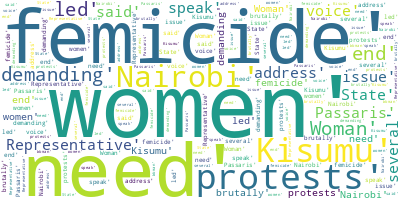

In [16]:
  generate_wordcloud(frequency_count.most_common(20))